# Model konkurence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

Následující kód modeluje chování společenství konkurence dvou populací pomocí
soustavy rovnic
$$
\begin{aligned}
\frac{\mathrm dx}{\mathrm dt}={}&(a-bx-cy)x,\\
\frac{\mathrm dy}{\mathrm dt}={}&(\alpha-\beta x-\gamma y)y.
\end{aligned}
$$
Koeficienty mezidruhové konkurence $c$ a $\beta$ jsou nastaveny tak, aby druh $x$ dominoval. Ostatní koeficiety jsou nastaveny na jednotkovou velikost. Pro srovnání je studován i model, kdy se populace $x$ a $y$ neovlivňují a  koeficienty mezidruhové konkurence jsou nulové.

In [2]:
def konkurence(t,X,a=1,b=1,c=0,alpha=1,beta=0,gamma=1):
    x,y= X
    return [(a-b*x-c*y)*x, (alpha-beta*x-gamma*y)*y]

meze = [0,50]
pocatecni_podminka = [0.1,0.5]
t = np.linspace(*meze,500)

df = pd.DataFrame(index=t)
df.index.name ="čas"

for c,beta,sloupce in zip( [0.8,0] , [1.2, 0] , [["x","y"],["x0","y0"]]):
    print (f"Řeším pro c={c}, beta={beta}, výstup do {sloupce}.")
    df[sloupce] = solve_ivp(
                       lambda t,X:konkurence(t,X,c=c,beta=beta),
                       meze,
                       pocatecni_podminka,
                       t_eval=t
                       ).y.T
df.tail()



Řeším pro c=0.8, beta=1.2, výstup do ['x', 'y'].
Řeším pro c=0, beta=0, výstup do ['x0', 'y0'].


,x,y,x0,y0
čas,,,,
49.599198,0.999500,0.000271,0.999168,0.999933
49.699399,0.999525,0.000266,0.999247,0.999939
49.799599,0.999548,0.000260,0.999319,0.999945
49.899800,0.999570,0.000255,0.999384,0.999950
50.000000,0.999591,0.000250,0.999442,0.999955


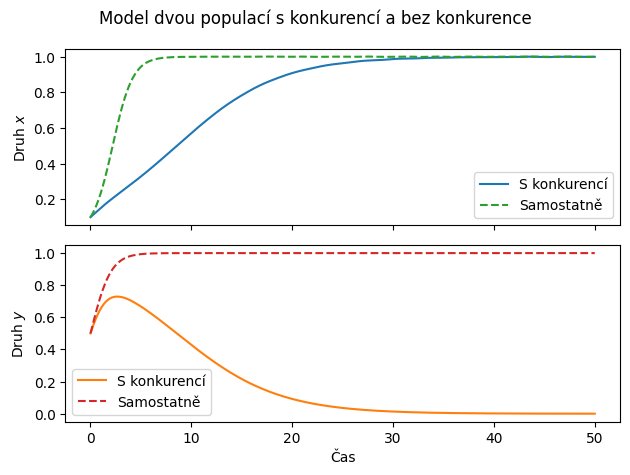

In [3]:
ax = df.plot(
    subplots=[("x","x0"),("y","y0")],
    legend=False,
    style=["-"]*2+["--"]*2
)
ax[0].set(
    ylabel="Druh $x$",
)
ax[1].set(
    xlabel="Čas",
    ylabel="Druh $y$",
)

ax[0].legend(["S konkurencí", "Samostatně"])
ax[1].legend(["S konkurencí", "Samostatně"])
plt.suptitle("Model dvou populací s konkurencí a bez konkurence")
plt.tight_layout();

Následující kód je minimalistickým kódem pro model konkurence dvou populací a vykreslení řešení tohoto modelu.

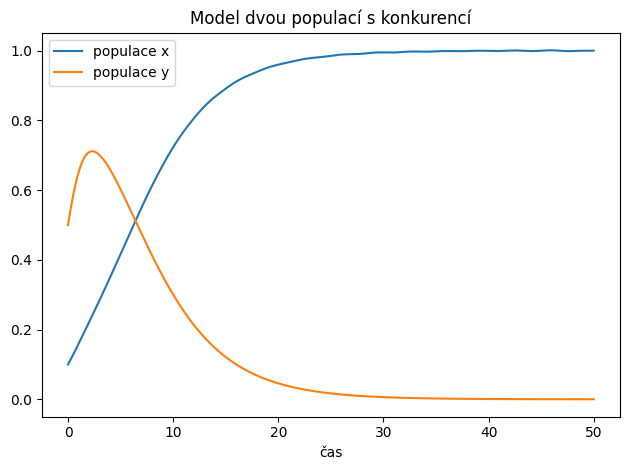

In [4]:
def model(t,X,a=1,b=1,c=0.7,alpha=1,beta=1.2,gamma=1):
    x,y = X
    return [(a-b*x-c*y)*x, (alpha-beta*x-gamma*y)*y]

meze = [0,50]
pocatecni_podminka = [0.1,0.5]
sloupce = ["populace x","populace y"]

t = np.linspace(*meze,500)
df = pd.DataFrame(index=t)
df.index.name ="čas"

df[sloupce] = solve_ivp(
                       model,
                       meze,
                       pocatecni_podminka,
                       t_eval=t
                       ).y.T
ax = df.plot()

ax.set(title="Model dvou populací s konkurencí")
plt.tight_layout();

Model upravíme

* přidejte do modelu predátora
* predátor se živí dominantní kořistí
* ukažte, že přítomnost predátora může pomoct populaci konkurečně slabšího druhu přežít
* model bude mít 
    * tři závislé proměnné, 
    * tři rovnice, 
    * tři počáteční podmínky, 
    * tři sloupce v tabulce s výsledky

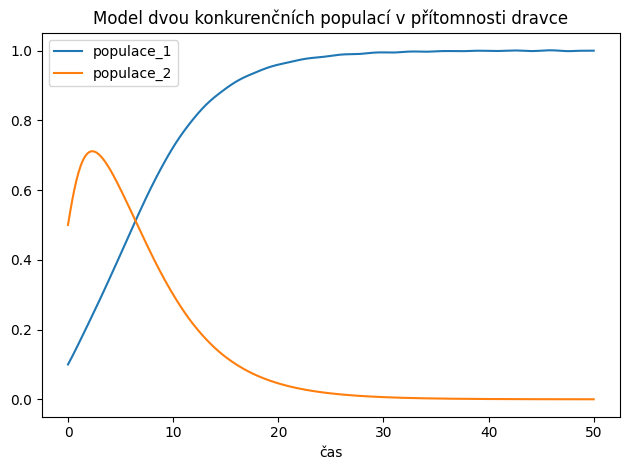

In [22]:
def model(t,X,a=1,b=1,c=0.7,alpha=1,beta=1.2,gamma=1):
    x,y = X
    return [(a-b*x-c*y)*x, (alpha-beta*x-gamma*y)*y]

meze = [0,50]
pocatecni_podminka = [0.1,0.5]
sloupce = ["populace_1","populace_2"]

t = np.linspace(*meze,500)
df = pd.DataFrame(index=t)
df.index.name ="čas"

df[sloupce] = solve_ivp(
                       model,
                       meze,
                       pocatecni_podminka,
                       t_eval=t
                       ).y.T
ax = df.plot()

ax.set(title="Model dvou konkurenčních populací v přítomnosti dravce")
plt.tight_layout();

In [23]:
df.tail()

,populace_1,populace_2
čas,,
49.599198,0.999606,0.000124
49.699399,0.999608,0.000121
49.799599,0.999613,0.000119
49.899800,0.999625,0.000117
50.000000,0.999646,0.000114
